# AM 207, Pset 1
## Spencer Hallyburton
### Collaborator: Salvador Barragan

In [89]:
# Up-front things
import matplotlib.pyplot as plt
import numpy as np
import csv
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from scipy import stats

font_val = 18
plt.rc('font', size=font_val)          # controls default text sizes
plt.rc('axes', titlesize=font_val)
plt.rc('axes', labelsize=font_val)    # fontsize of the x and y labels
plt.rc('legend', fontsize=(font_val-3))    # legend fontsize
plt.rc('font', family='Sans Serif')


# Problem 2: Part A - Computing MLE Parameter

In [111]:
# Problem 2, Part A:

# (2.A) Computing Sum
x = np.array([[0.5,2.5], [3.2,1.3], [2.72,5.84], [10.047,0.354]])
x = np.transpose(x)
sum_out = sum(map(lambda x:x*x, np.reshape(x,(-1,1))))
print('Sum of Squared Elements:', sum_out)
lam = 8/sum_out
print('Lambda Parameter:', lam)

Sum of Squared Elements: [ 161.001525]
Lambda Parameter: [ 0.04968897]


# Problem 2: Part B - Visualizing Data and Distribution

[ 0.00893763  0.02271058  0.01994895  0.00023154]


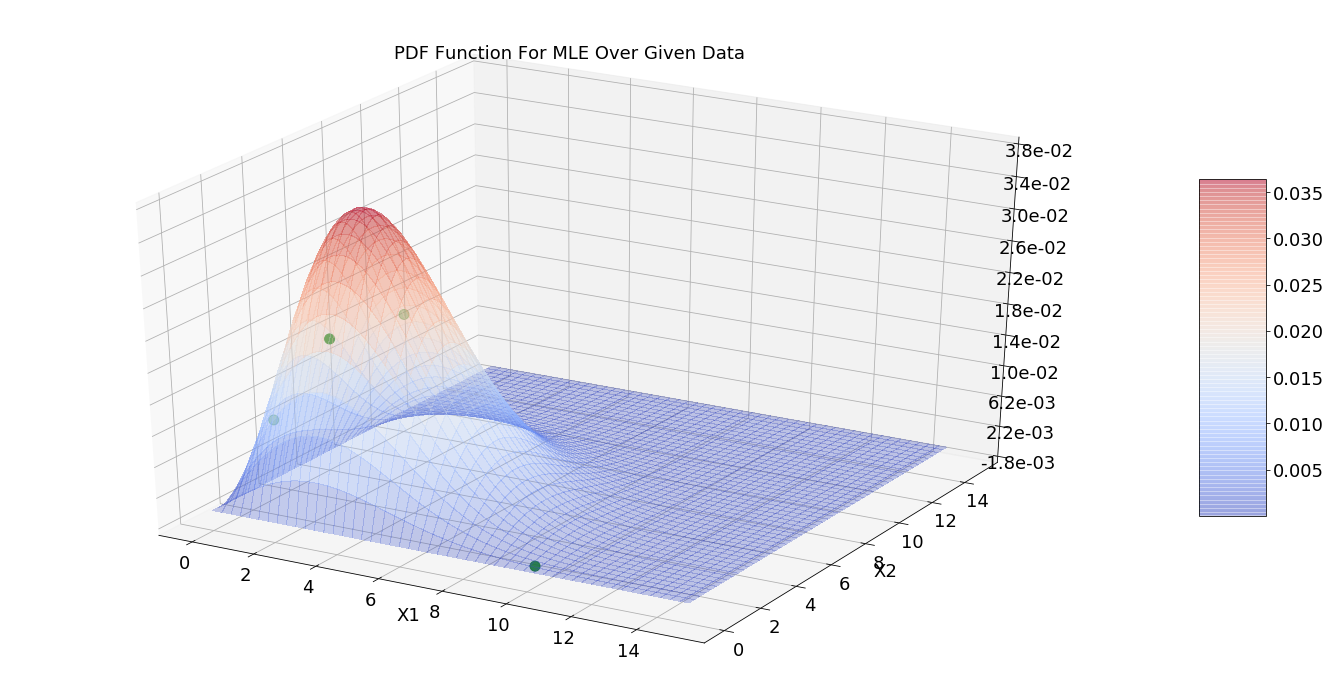

In [137]:
# Problem 2, Part B:
# (2.B) Visualizing Data and Distribution

# Function for PDF
def PDF_func(x):
    return 4*lam**2*x[0]*x[1]*np.exp(-lam*(x[0]**2 + x[1]**2 ))

xspec = PDF_func(x)

# Mesh Grid Space
X1 = np.arange(0, 15, 0.05)
X2 = np.arange(0, 15, 0.05)
X1, X2 = np.meshgrid(X1, X2)
Z = PDF_func([X1,X2])

# Plot in 3D
fig = plt.figure(figsize=(20,10))
ax = fig.gca(projection='3d')

# Plot Surface
surf = ax.plot_surface(X1, X2, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False, alpha=.3, label='PDF')
# Add Points in Green:
ax.scatter(x[0,:], x[1,:], PDF_func(x), s=100, c='g', label='Given Data')

# Customize the z axis.
ax.zaxis.set_major_locator(LinearLocator(11))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.01e'))

# Color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

# Add titles and labels
ax.set_title('PDF Function For MLE Over Given Data')
ax.set_xlabel('X1')
ax.set_ylabel('X2')

plt.tight_layout()
plt.show()

# Problem 3: Part A - Visualization of Data and Distribution

### (3.A.1) 2-D Visualization of the Distribution of Data


Data Shape: (10000, 2)
Mean Along Each Dimension: [ 3.99276398  4.99814632]
Variance Along Each Dimension: [ 0.48564757  0.50525708]


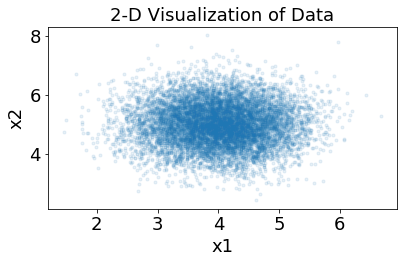

In [92]:
# Problem 3, Part A:
# Load in the data
data = np.genfromtxt(r'Homework_1_Data.txt', delimiter=',')
print('Data Shape:', np.shape(data))
print('Mean Along Each Dimension:', np.mean(data, axis=0))
print('Variance Along Each Dimension:', np.var(data, axis=0))

# (3.A.1) 2-D Visualization of the Distribution of Data
plt.scatter(data[:,0], data[:,1], marker='.', alpha=.1)
plt.title('2-D Visualization of Data')
plt.xlabel('x1')
plt.ylabel('x2')
plt.tight_layout()
plt.show()

### (3.A.2) Visualize the PDF of the distribution of data


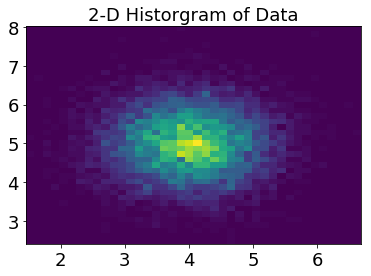

In [93]:
# (3.A.2) Visualize the PDF of the distribution of data
# 2-D Histogram
plt.hist2d(data[:,0], data[:,1], bins = 40)
plt.title('2-D Historgram of Data')
plt.show()

Given the 2-dimensional histogram of the data, we observe that this data is most likely a 2-dimensional normal distribution, given that there is a concentration of points near the mean of each dimension of the data. The general form of this kind of normal distribution is:

$$f(x,y) = A \exp\left(- \left(\frac{(x-\bar{x})^2}{2\sigma_x^2} + \frac{(y-\bar{y})^2}{2\sigma_y^2} \right)\right)$$

Citation: https://en.wikipedia.org/wiki/Gaussian_function#Two-dimensional_Gaussian_function

We can visualize the coefficient, $A$, as the height of the peak at the mean value of the gaussian. To determine this value, we can apply the normalization condition for the volume under the Gaussian:

The volume under the Gaussian function is given by
$$V = 1 = \int_{-\infty}^\infty \int_{-\infty}^\infty f(x,y)\,dx \,dy=2 \pi A \sigma_x \sigma_y$$


In [100]:
# Get the coefficient, A:
sigx = np.std(data, axis=0)[0]
sigy = np.std(data, axis=0)[1]
######################################################

# Plot the 2-D Gaussian Function:
# Function for PDF
def PDF_func_2(x, sigx, sigy):
    A = 1/(2*np.pi*sigx*sigy)
    return A*np.exp(-lam*(x[0]**2 + x[1]**2 ))

xspec = PDF_func(x)

# Mesh Grid Space
X1 = np.arange(0, 15, 0.05)
X2 = np.arange(0, 15, 0.05)
X1, X2 = np.meshgrid(X1, X2)
Z = PDF_func([X1,X2])

# Plot in 3D
fig = plt.figure(figsize=(20,10))
ax = fig.gca(projection='3d')

# Plot Surface
surf = ax.plot_surface(X1, X2, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False, alpha=.3, label='PDF')
# Add Points in Green:
ax.scatter(x[0,:], x[1,:], PDF_func(x), s=100, c='g', label='Given Data')

# Customize the z axis.
ax.zaxis.set_major_locator(LinearLocator(11))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.01e'))

# Color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

# Add titles and labels
ax.set_title('PDF Function For MLE Over Given Data')
ax.set_xlabel('X1')
ax.set_ylabel('X2')

plt.tight_layout()
plt.show()

0.321294519126


NameError: name 'PDF_func' is not defined

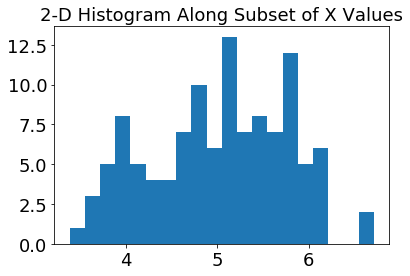

In [159]:
# (3.A.3) Distribution defined by fx2|x1 for x1 contained in some range
# Get all points where x1 is in a certain range:
xr = [3.99, 4.01]
data_range_X = data[(data[:,0]>xr[0]) & (data[:,0]<xr[1]), :]

plt.hist(data_range_X[:,1], bins = 20)
plt.title('2-D Histogram Along Subset of X Values')
plt.show()

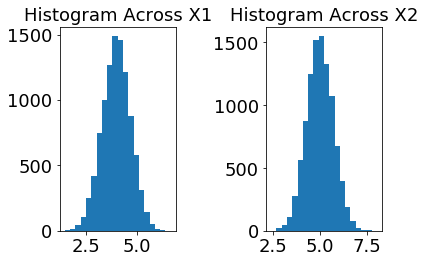

In [151]:
# (3.A.4) Distribution Defined by fx1
fig, ax = plt.subplots(1,2)
ax[0].hist(data[:,0], bins=20)
ax[0].set_title('Histogram Across X1')
ax[1].hist(data[:,1], bins=20)
ax[1].set_title('Histogram Across X2')
plt.tight_layout()
plt.show()

# Problem 3: Part B - Bootstrapping

# Problem 4: Missing Data

In [78]:
# (4) Missing Data
import pandas as pd
wine_data = pd.read_csv('wine_quality_missing.csv')
print('Original Shape (Rows x Columns):', wine_data.shape)
wine_data.head()

Original Shape (Rows x Columns): (178, 14)


,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,Class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,1
1,13.20,1.78,2.14,NaN,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,1
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,1
3,14.37,1.95,2.50,NaN,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,1
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,NaN,4.32,1.04,2.93,735.0,1


In [87]:
wine_data = pd.read_csv('wine_quality_missing.csv')

# Show which columnas have at least one NaN entry at the beginning
NaNcols0 = wine_data.isnull().any(axis=0)
print('ORIGINAL:')
print('Columns that have at least one NaN entry:', np.sum(NaNcols0))

# (4.1) Drop Imputation
print('\nDROP IMPUTATION:')
wine_DropImp = wine_data[wine_data.notnull().all(axis=1)]
print('Shape With Drop Imputation (Rows x Columns):', wine_DropImp.shape)
NaNcols1 = wine_DropImp.isnull().any(axis=0)
print('Columns that have at least one NaN entry:', np.sum(NaNcols1))

# (4.2) Mean Imputation
print('\nMEAN IMPUTATION:')
wine_MeanImp = wine_data
for colname in wine_MeanImp.columns:
    NaNlocs = wine_MeanImp[colname].isnull()
    wine_MeanImp[NaNlocs] = np.mean(wine_MeanImp[colname])

NaNcols2 = wine_MeanImp.isnull().any(axis=0)
print('Shape With Mean Imputation (Rows x Columns):', wine_MeanImp.shape)
print('Columns that have at least one NaN entry:', np.sum(NaNcols2), '\n')

ORIGINAL:
0.Columns that have at least one NaN entry: 13

DROP IMPUTATION:
Shape With Drop Imputation (Rows x Columns): (43, 14)
Columns that have at least one NaN entry: 0

MEAN IMPUTATION:
Shape With Mean Imputation (Rows x Columns): (178, 14)
Columns that have at least one NaN entry: 0 



In [ ]:
# (4.3) Empirical Estimation of PDF using bootstrap

